# Parameters

In [12]:
dataset_name = 'codex-m'

symbolic_name = 'AnyBURL'
symbolic = 'anyburl'

subsymbolic_name = 'ComplEx'
subsymbolic = 'complex'

bp_threshold = 5

# Imports

In [13]:
%run utils.ipynb
%run graphs.ipynb
%run format_predictions.ipynb

from matplotlib.backends.backend_pdf import PdfPages
import os
import pandas as pd

# Load Data

In [14]:
df = get_prediction_data(dataset_name, symbolic, subsymbolic)
df.head(10)

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,h,r,t,rank_filtered_kge,rank_filtered_0,rank_filtered_1,rank_filtered_2,rank_filtered_3,rank_filtered_4
0,0,10,2991,False,33.0,Q108946,P136,Q3072039,9,8,9,8,8,12
1,0,10,2991,True,61.0,Q108946,P136,Q3072039,15,9,14,28,6,19
2,2,1,559,False,24.0,Q1041,P463,Q3348506,2,3,1,2,1,1
3,2,1,559,True,33.0,Q1041,P463,Q3348506,4,3,5,5,4,4
4,2,7,910,False,1.0,Q1041,P530,Q1011,1,1,1,1,1,1
5,2,7,910,True,1.0,Q1041,P530,Q1011,1,1,1,1,1,1
6,15,1,250,False,12.0,Q739,P463,Q4230,2,3,1,2,2,1
7,15,1,250,True,3.0,Q739,P463,Q4230,1,1,1,1,1,1
8,15,7,1695,False,1.0,Q739,P530,Q29,2,2,4,1,1,2
9,15,7,1695,True,1.0,Q739,P530,Q29,3,1,2,1,1,9


In [15]:
df = df[['h_id', 'r_id', 't_id', 'predicted_head', 'rank_filtered_anyburl', 'rank_filtered_kge']]
df.head(10)

,h_id,r_id,t_id,predicted_head,rank_filtered_anyburl,rank_filtered_kge
0,0,10,2991,False,33.0,9
1,0,10,2991,True,61.0,15
2,2,1,559,False,24.0,2
3,2,1,559,True,33.0,4
4,2,7,910,False,1.0,1
5,2,7,910,True,1.0,1
6,15,1,250,False,12.0,2
7,15,1,250,True,3.0,1
8,15,7,1695,False,1.0,2
9,15,7,1695,True,1.0,3


## drop NAs (why are there NAs at all?)

In [16]:
len(df)

20622

In [17]:
df['rank_filtered_anyburl'].isnull().sum()

592

In [18]:
df['rank_filtered_kge'].isnull().sum()

0

In [19]:
df = df.dropna()

In [20]:
len(df)

20030

# Analysis

## create PDF

In [21]:
pdf = PdfPages(f'analysis_for_{get_formatted_data_name(dataset_name, symbolic, subsymbolic)[0:-4]}.pdf')

## show graphs

Loading configuration of dataset codex-m from d:\files\git\kge\data\codex-m ...
Loaded 51 keys from map relation_ids
Loaded 51 keys from map relation_strings
  91210 distinct sp pairs in train
  9926 distinct po pairs in train


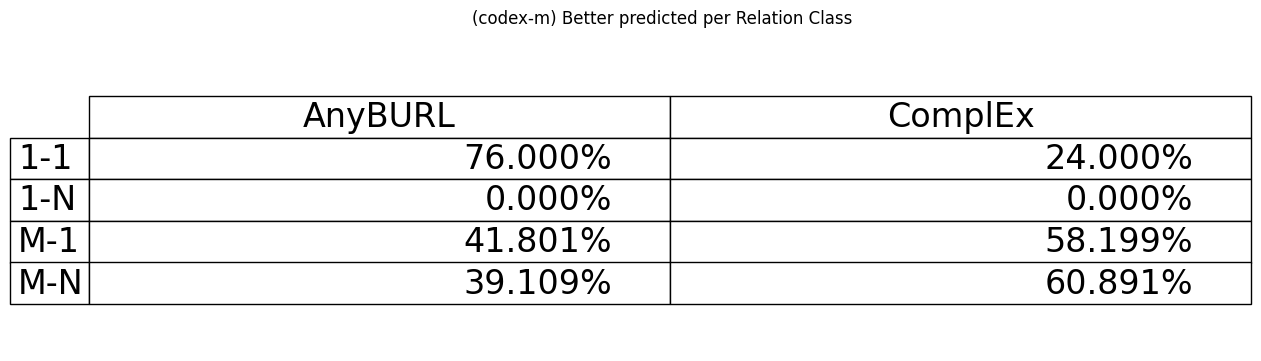

In [34]:
%run graphs.ipynb
show_better_predicted_triples_per_relation_class_table(df, dataset_name, bp_threshold)

In [ ]:
show_all_graphs(df, dataset_name, bp_threshold)

## close PDF

In [ ]:
pdf.close()